# Desafio 3

Neste desafio, iremos praticar nossos conhecimentos sobre distribuições de probabilidade. Para isso,
dividiremos este desafio em duas partes:
    
1. A primeira parte contará com 3 questões sobre um *data set* artificial com dados de uma amostra normal e
    uma binomial.
2. A segunda parte será sobre a análise da distribuição de uma variável do _data set_ [Pulsar Star](https://archive.ics.uci.edu/ml/datasets/HTRU2), contendo 2 questões.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

/home/jonathan/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Parte 1

### _Setup_ da parte 1

In [4]:
np.random.seed(42)
    
dataframe = pd.DataFrame({"normal": sct.norm.rvs(20, 4, size=10000),
                     "binomial": sct.binom.rvs(100, 0.2, size=10000)})

## Inicie sua análise a partir da parte 1 a partir daqui

In [5]:
# Sua análise da parte 1 começa aqui.

In [6]:
df = dataframe.copy()
df.head()

,normal,binomial
0,21.986857,18
1,19.446943,15
2,22.590754,14
3,26.092119,15
4,19.063387,21


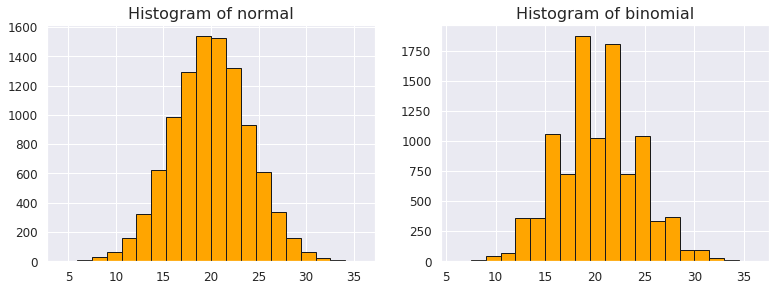

In [7]:
i=1
plt.figure(figsize=(20,20))
for c in df.describe().columns:
    plt.subplot(4,3,i)
    plt.title(f"Histogram of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df[c],bins=20,color='orange',edgecolor='k')
    i+=1
plt.show()

In [8]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
normal,10000.0,19.991456,4.013850,4.310399,17.309638,19.98962,22.684324,35.704951
binomial,10000.0,20.097000,4.041191,6.000000,17.000000,20.00000,23.000000,36.000000


## Questão 1

Qual a diferença entre os quartis (Q1, Q2 e Q3) das variáveis `normal` e `binomial` de `dataframe`? Responda como uma tupla de três elementos arredondados para três casas decimais.

Em outra palavras, sejam `q1_norm`, `q2_norm` e `q3_norm` os quantis da variável `normal` e `q1_binom`, `q2_binom` e `q3_binom` os quantis da variável `binom`, qual a diferença `(q1_norm - q1 binom, q2_norm - q2_binom, q3_norm - q3_binom)`?

In [9]:
def q1():
    '''Calculates difference between each of the normoal and binomial quantiles
    ARG: ---
    RETURNS:
    round_diff(tuple): The tuple contaning the differences
    '''
    # Calculate the difference between each quantile
    diff = np.percentile(df.normal, [25 ,50, 75]) - np.percentile(df.binomial, [25 ,50, 75])
    
    #Round the difference
    round_diff = tuple(np.round(diff,3))
    return round_diff

Para refletir:

* Você esperava valores dessa magnitude?
* Você é capaz de explicar como distribuições aparentemente tão diferentes (discreta e contínua, por exemplo) conseguem dar esses valores?

 Sim. A principal diferença entre a distribuição normal e a binomial é o fato da primeira contíua e a segunda discreta. Além disso, o shape da distribuição binomial se aproxida do da normal quando o sample size é grande. Não é raro ver estudos onde aproximam a distribuição binomial para uma normal quando possuem muitos dados na análise.



## Questão 2

Considere o intervalo $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ é a média amostral e $s$ é o desvio padrão. Qual a probabilidade nesse intervalo, calculada pela função de distribuição acumulada empírica (CDF empírica) da variável `normal`? Responda como uma único escalar arredondado para três casas decimais.

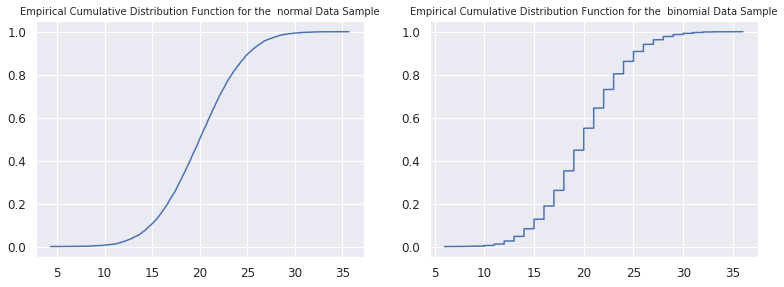

In [10]:
i=1
plt.figure(figsize=(20,20))
for c in df.columns:
    ecdf = ECDF(df[c])
    plt.subplot(4,3,i)
    plt.title(f"Empirical Cumulative Distribution Function for the  {c} Data Sample",fontsize=10)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.plot(ecdf.x, ecdf.y)
    i+=1
plt.show()

In [11]:
def q2():
    '''Calculates the probability of the interval [𝑥¯−𝑠,𝑥¯+𝑠] 
    ARG: ---
    RETURNS:
    prob_diff(float):  The probability'''

    ecdf_norm = ECDF(df.normal)
    mean,std = df['normal'].mean(), df['normal'].std()
    mean_minus_std_prob =  ecdf_norm([mean-std])
    mean_plus_std_prob =  ecdf_norm([mean+std])
    
    prob_diff = float(np.round(mean_plus_std_prob - mean_minus_std_prob,3))
    
    
    return prob_diff

In [12]:
q2()

0.684

Para refletir:

* Esse valor se aproxima do esperado teórico?
* Experimente também para os intervalos $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$.

 Sim.Espera-se uma probabilidade em torno de 68% para o intervalor  $[\bar{x} - s, \bar{x} + s]$, onde $\bar{x}$ em uma distribuição normal. Para os intervalos  $[\bar{x} - 2s, \bar{x} + 2s]$ e $[\bar{x} - 3s, \bar{x} + 3s]$, espera-se probabilidades em tornoo de 95% e 99% respectivamente, como podemos ver abaixo.


In [13]:
def ECDF_interval(std_from_the_mean = 1):
    '''Calculates the probability of a given interval
    ARG: ---
    RETURNS:
    prob_diff(float):  The probability'''
    
     

    ecdf_norm = ECDF(df.normal)
    mean,std = df['normal'].mean(), df['normal'].std()
    mean_minus_std_prob =  ecdf_norm([mean-std*std_from_the_mean])
    mean_plus_std_prob =  ecdf_norm([mean+std*std_from_the_mean])
    
    prob_diff = float(np.round(mean_plus_std_prob - mean_minus_std_prob,3))
    
    
    return prob_diff

In [14]:
ECDF_interval(std_from_the_mean=2)

0.954

In [15]:
ECDF_interval(std_from_the_mean=3)

0.997

## Questão 3

Qual é a diferença entre as médias e as variâncias das variáveis `binomial` e `normal`? Responda como uma tupla de dois elementos arredondados para três casas decimais.

Em outras palavras, sejam `m_binom` e `v_binom` a média e a variância da variável `binomial`, e `m_norm` e `v_norm` a média e a variância da variável `normal`. Quais as diferenças `(m_binom - m_norm, v_binom - v_norm)`?

In [16]:
def q3():
    
    '''Calculates the difference between the mean and variance of both the normal and binomial distributions
    
    ARG: --- 
    RETURNS:
    diff(tuple) : The tuple containing the result of the differences
    '''
       
    m_norm,m_binom = df.mean()
    v_norm,v_binom = df.var()
    
    diff = np.round(m_binom - m_norm,3),np.round(v_binom - v_norm,3)
    

    return diff
    

In [17]:
q3()

(0.106, 0.22)

Para refletir:

* Você esperava valore dessa magnitude?
* Qual o efeito de aumentar ou diminuir $n$ (atualmente 100) na distribuição da variável `binomial`?

Quanto maior o valor do n, maior serão a média e a variância da distribuição binomial. Podemos notar isso mais claramente quando olhamos para as fórmulas abaixo, onde temos a relação entre a variável n, a média e a variancia da distribuição.


 <h3 align="center">Probability mass function:</h3> 
\begin{equation*}
f(k)   = {n \choose k} p^k (1-p)^{ n-k}
\end{equation*}

 <h3 align="center">Mean of a binomial distribution:</h3> 

\begin{equation*}
E(X)   =  n.p
\end{equation*}


 <h3 align="center">Variance of a binomial distribution:</h3> 
\begin{equation*}
E(X)   =  n.p.(1-p)
\end{equation*}

In [18]:
def mean_variance_diff(n_binomial,df):
    
    '''Creates a binomial distribution according to the given n and calculates the 
    difference between their mean and variance.
    
    ARG: 
    n_binomial(integer): The n variable of the bonomial distribution
    df (dataframe): the dataframe with distributions
    RETURNS:
    diff(tuple) : The tuple containing the result of the differences
    
    '''

    np.random.seed(42)
    
    binomial = sct.binom.rvs(n_binomial, 0.2, size=100000)
    
    m_norm, v_norm = df['normal'].mean(),df['normal'].var()
    m_binom, v_binom = binomial.mean(),binomial.var()
    
    
    diff = np.round(m_binom - m_norm,3),np.round(v_binom - v_norm,3)
    

    return diff

In [19]:
mean_variance_diff(100,df= df)

(-0.003, -0.196)

In [20]:
mean_variance_diff(150,df= df)

(9.996, 7.753)

In [21]:
mean_variance_diff(110,df= df)

(1.998, 1.379)

In [22]:
mean_variance_diff(120,df= df)

(3.998, 2.981)

In [23]:
mean_variance_diff(130,df= df)

(5.996, 4.579)

## Parte 2

### _Setup_ da parte 2

In [24]:
stars = pd.read_csv("pulsar_stars.csv")

stars.rename({old_name: new_name
              for (old_name, new_name)
              in zip(stars.columns,
                     ["mean_profile", "sd_profile", "kurt_profile", "skew_profile", "mean_curve", "sd_curve", "kurt_curve", "skew_curve", "target"])
             },
             axis=1, inplace=True)

stars.loc[:, "target"] = stars.target.astype(bool)

## Inicie sua análise da parte 2 a partir daqui

In [25]:
# Sua análise da parte 2 começa aqui.
df2 = stars.copy()
df2.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [26]:
df2.shape

(17897, 9)

In [27]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
mean_profile,17897.0,111.078321,25.652705,5.812500,100.929688,115.078125,127.085938,192.617188
sd_profile,17897.0,46.549021,6.843040,24.772042,42.375426,46.946435,51.022887,98.778911
kurt_profile,17897.0,0.477897,1.064056,-1.876011,0.027108,0.223241,0.473349,8.069522
skew_profile,17897.0,1.770417,6.168058,-1.791886,-0.188528,0.198736,0.928206,68.101622
mean_curve,17897.0,12.614926,29.473637,0.213211,1.923077,2.801839,5.464883,223.392140
sd_curve,17897.0,26.326918,19.471042,7.370432,14.437330,18.459977,28.428152,110.642211
kurt_curve,17897.0,8.303574,4.506217,-3.139270,5.781485,8.433872,10.702973,34.539844
skew_curve,17897.0,104.859419,106.517270,-1.976976,34.957119,83.068996,139.310905,1191.000837


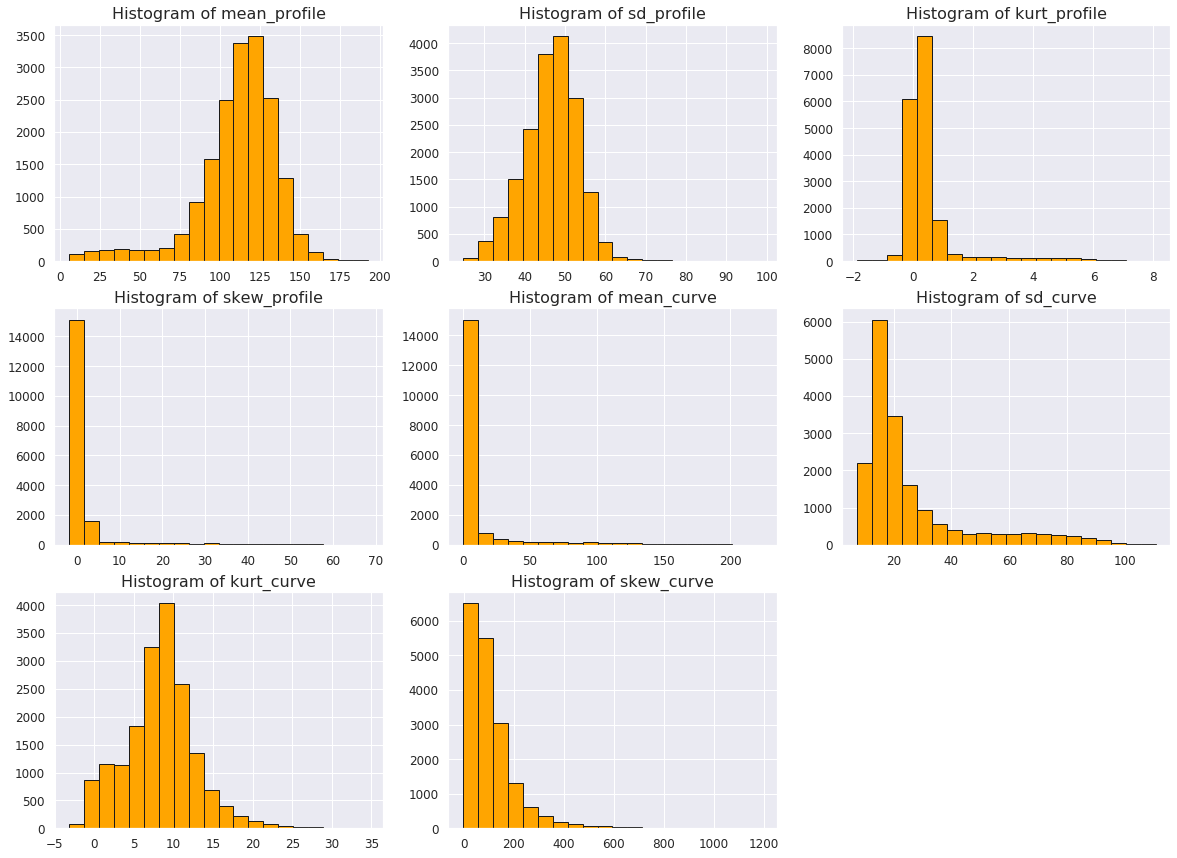

In [28]:
i=1
plt.figure(figsize=(20,20))
for c in df2.columns[:-1]:
    plt.subplot(4,3,i)
    plt.title(f"Histogram of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.hist(df2[c],bins=20,color='orange',edgecolor='k')
    i+=1
plt.show()

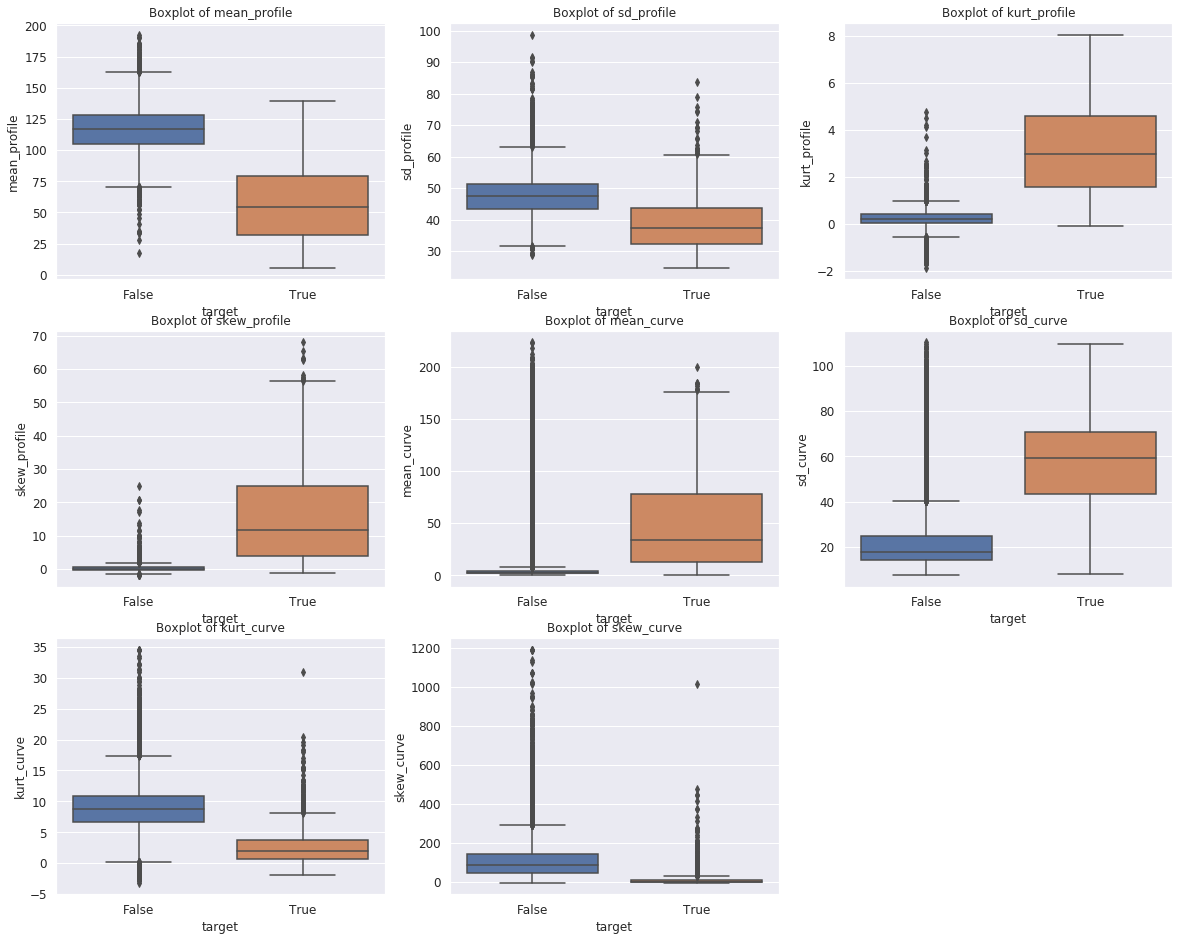

<Figure size 864x576 with 0 Axes>

In [29]:
i=1
plt.figure(figsize=(20,33))
for c in df2.columns[:-1]:
    plt.subplot(6,3,i)
    plt.title(f"Boxplot of {c}",fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df2[c],x=df2['target'])
    i+=1
plt.show()
plt.tight_layout()

In [30]:
df2.head()

,mean_profile,sd_profile,kurt_profile,skew_profile,mean_curve,sd_curve,kurt_curve,skew_curve,target
0,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,False
1,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,False
2,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,False
3,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,False
4,93.570312,46.698114,0.531905,0.416721,1.636288,14.545074,10.621748,131.394004,False


In [31]:
df2.columns

Index(['mean_profile', 'sd_profile', 'kurt_profile', 'skew_profile',
       'mean_curve', 'sd_curve', 'kurt_curve', 'skew_curve', 'target'],
      dtype='object')

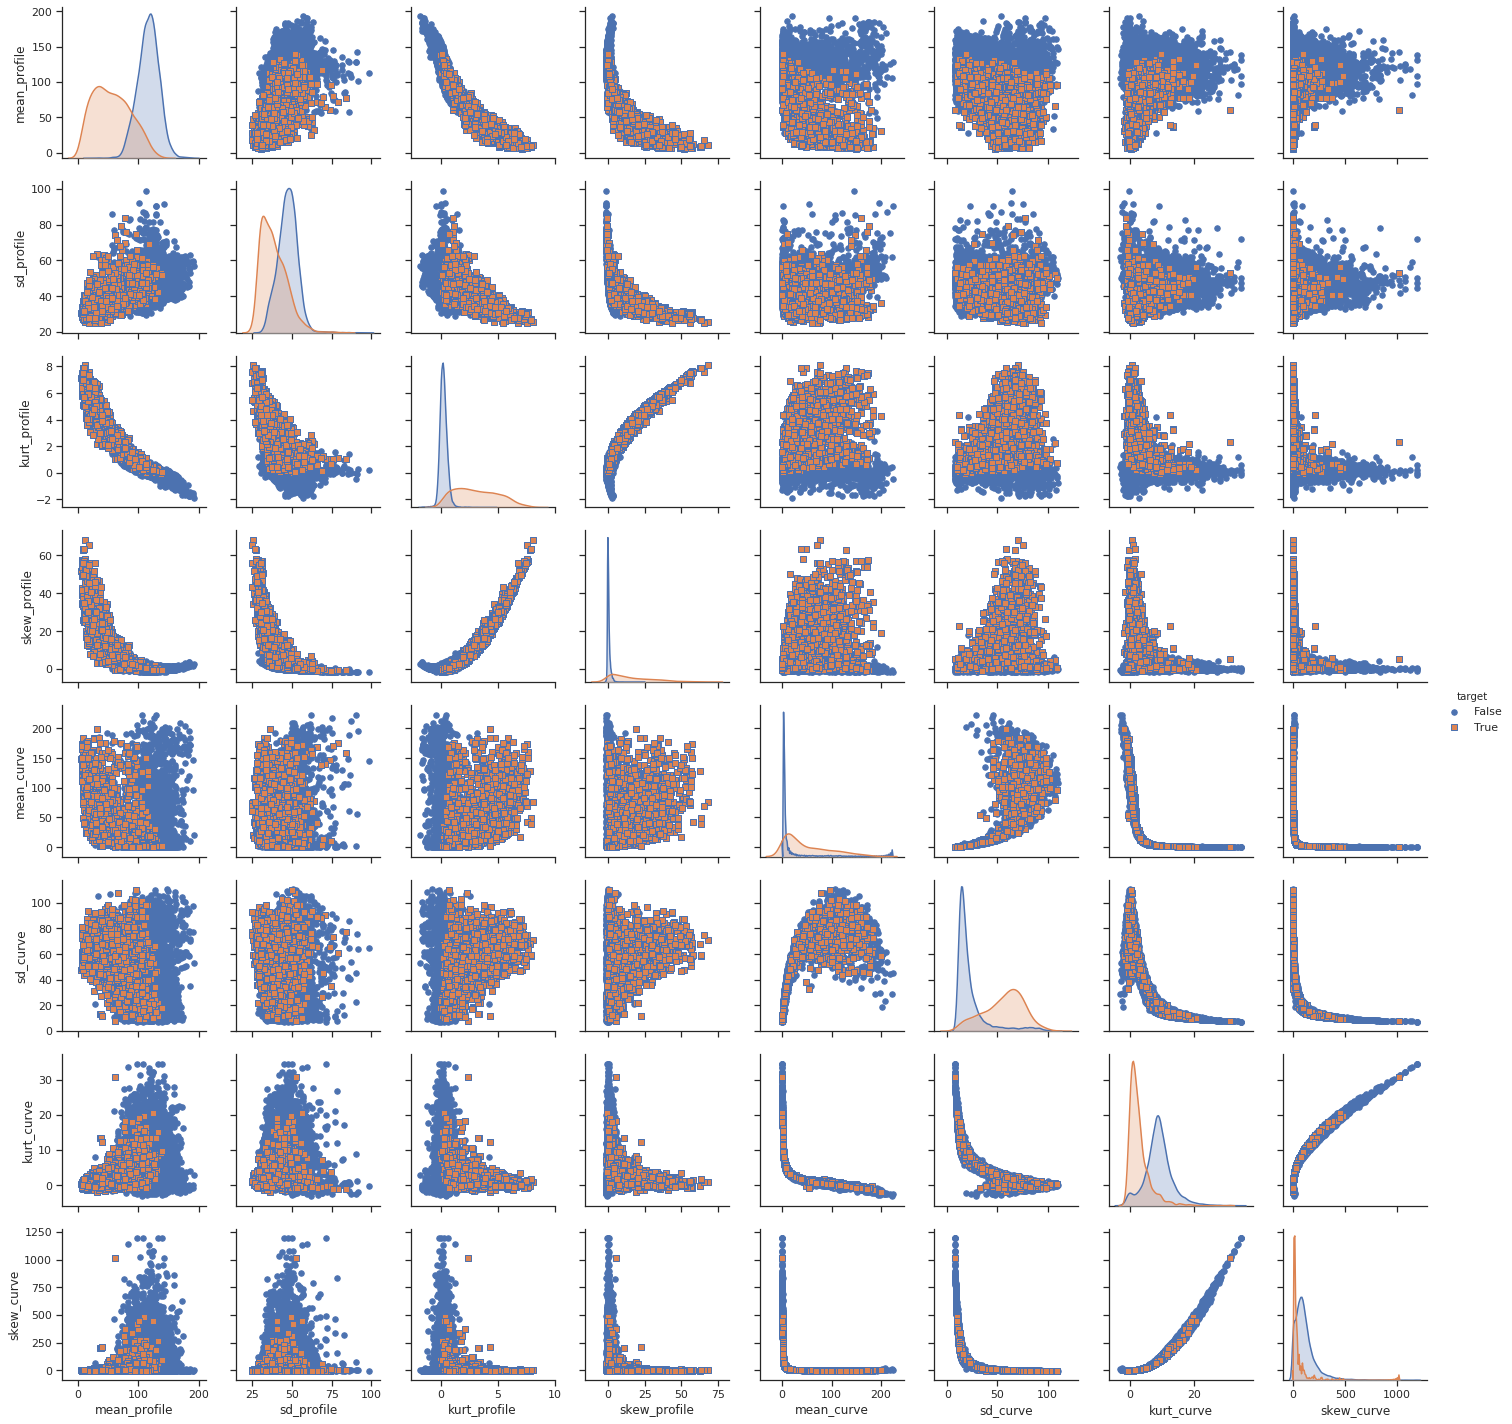

In [32]:
sns.set(style="ticks", color_codes=True)
g=sns.pairplot(df2,vars=['mean_profile', 'sd_profile', 'kurt_profile', 'skew_profile',
       'mean_curve', 'sd_curve', 'kurt_curve', 'skew_curve'],
               plot_kws=dict(s=30, edgecolor="b", linewidth=1),
               hue="target",markers=["o", "s"],
               diag_kind="kde",diag_kws=dict(shade=True))

## Questão 4

Considerando a variável `mean_profile` de `stars`:

1. Filtre apenas os valores de `mean_profile` onde `target == 0` (ou seja, onde a estrela não é um pulsar).
2. Padronize a variável `mean_profile` filtrada anteriormente para ter média 0 e variância 1.

Chamaremos a variável resultante de `false_pulsar_mean_profile_standardized`.

Encontre os quantis teóricos para uma distribuição normal de média 0 e variância 1 para 0.80, 0.90 e 0.95 através da função `norm.ppf()` disponível em `scipy.stats`.

Quais as probabilidade associadas a esses quantis utilizando a CDF empírica da variável `false_pulsar_mean_profile_standardized`? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [36]:
def q4():
    
    '''Filters data with target equals zero, calculates quartile and their probabilities
    
    ARG: --- 
    RETURNS:
    prob(tuple): The tuple containing the probabilities'''
    

    #Filter dataframe
    filter_df = df2.loc[df2['target'] == 0, :]['mean_profile']
    #standardize dataframe
    false_pulsar_mean_profile_standardized = sct.zscore(filter_df)
    # calculate quartiles
    quartiles = sct.norm.ppf([.8, .9, .95])
    #Quantile probabilities
    ecdf = ECDF(false_pulsar_mean_profile_standardized)
    q80,q90,q95 = quartiles[0],quartiles[1],quartiles[2]
    prob = tuple(ecdf([quartiles[0],quartiles[1],quartiles[2]]).round(3))
    
    return prob

In [37]:
q4()

(0.806, 0.911, 0.959)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?

Sim, pois a padronização dos dados faz com que uma distribuição que era negativamente assimetrica ficar simétrica e com média zero e variancia unitátia. Dessa forma, os quantiles tendem a ter valors proximas a probabilidade.

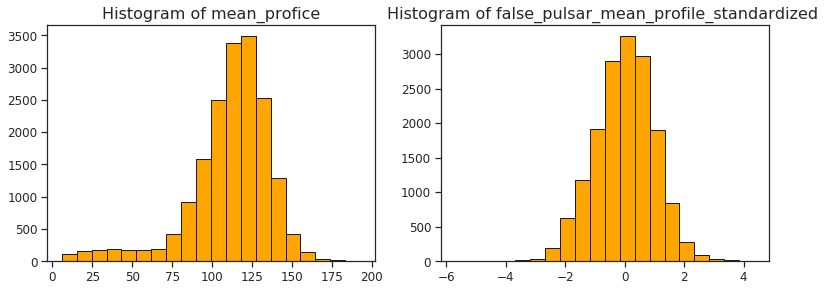

In [38]:
#Filter dataframe
filter_df = df2.loc[df2['target'] == 0, :]['mean_profile']
#standardize dataframe
false_pulsar_mean_profile_standardized = sct.zscore(filter_df)

plt.figure(figsize=(20,20))

plt.subplot(4,3,1)
plt.title(f"Histogram of mean_profice",fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.hist(df2['mean_profile'],bins=20,color='orange',edgecolor='k')

plt.subplot(4,3,2)
plt.title(f"Histogram of false_pulsar_mean_profile_standardized ",fontsize=16)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
plt.hist(false_pulsar_mean_profile_standardized,bins=20,color='orange',edgecolor='k')
plt.show()

## Questão 5

Qual a diferença entre os quantis Q1, Q2 e Q3 de `false_pulsar_mean_profile_standardized` e os mesmos quantis teóricos de uma distribuição normal de média 0 e variância 1? Responda como uma tupla de três elementos arredondados para três casas decimais.

In [39]:
def q5():
    
    ''' Calculates the difference between the quartiles of the normal distribution and the false_pulsar_mean_profile_standardized
    
    
    ARG: --- 
    
    RETURNS: 
    diff(tuple): The tuple with the quantile diferences'''
    
    #Filter dataframe
    filter_df = df2.loc[df2['target'] == 0, :]['mean_profile']
    #standardize dataframe
    false_pulsar_mean_profile_standardized = sct.zscore(filter_df)
    # calculate quartiles
    
    # calculate quantiles 
    quantiles = np.percentile(false_pulsar_mean_profile_standardized, [25 ,50, 75])

    # quantiles of normal distribution
    quantilies_norm = sct.norm.ppf([0.25, 0.5, 0.75])
    
    diff = np.round(quantiles - quantilies_norm,3)

    return tuple(diff)


In [40]:
q5()

(0.027, 0.04, -0.004)

Para refletir:

* Os valores encontrados fazem sentido?
* O que isso pode dizer sobre a distribuição da variável `false_pulsar_mean_profile_standardized`?
* Curiosidade: alguns testes de hipóteses sobre normalidade dos dados utilizam essa mesma abordagem.